In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing, utils, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df=pd.read_csv("./supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
del(df["Invoice ID"])
del(df["Date"])
del(df["Time"])

In [6]:
l_encoder = preprocessing.LabelEncoder()

encoded = l_encoder.fit(df["Branch"])
encoded = l_encoder.fit(df["Customer type"])
encoded = l_encoder.fit(df["Gender"])
encoded = l_encoder.fit(df["Payment"])
encoded = l_encoder.fit(df["City"])
encoded = l_encoder.fit(df["Product line"])

In [7]:
df["Product line"] = encoded.fit_transform(df["Branch"].values)
df["City"] = encoded.fit_transform(df["Branch"].values)
df["Branch"] = encoded.fit_transform(df["Branch"].values)
df["Customer type"] = encoded.fit_transform(df["Branch"].values)
df["Gender"] = encoded.fit_transform(df["Branch"].values)
df["Payment"] = encoded.fit_transform(df["Branch"].values)

In [8]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,0,0,0,0,74.69,7,26.1415,548.9715,0,522.83,4.761905,26.1415,9.1
1,2,2,2,2,2,15.28,5,3.8200,80.2200,2,76.40,4.761905,3.8200,9.6
2,0,0,0,0,0,46.33,7,16.2155,340.5255,0,324.31,4.761905,16.2155,7.4
3,0,0,0,0,0,58.22,8,23.2880,489.0480,0,465.76,4.761905,23.2880,8.4
4,0,0,0,0,0,86.31,7,30.2085,634.3785,0,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,2,2,2,40.35,1,2.0175,42.3675,2,40.35,4.761905,2.0175,6.2
996,1,1,1,1,1,97.38,10,48.6900,1022.4900,1,973.80,4.761905,48.6900,4.4
997,0,0,0,0,0,31.84,1,1.5920,33.4320,0,31.84,4.761905,1.5920,7.7
998,0,0,0,0,0,65.82,1,3.2910,69.1110,0,65.82,4.761905,3.2910,4.1


In [9]:
df.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

array([[<AxesSubplot:title={'center':'Branch'}>,
        <AxesSubplot:title={'center':'City'}>,
        <AxesSubplot:title={'center':'Customer type'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'Product line'}>,
        <AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'Payment'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

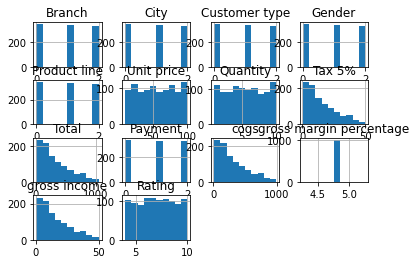

In [13]:
df.hist()

<AxesSubplot:xlabel='Total', ylabel='Count'>

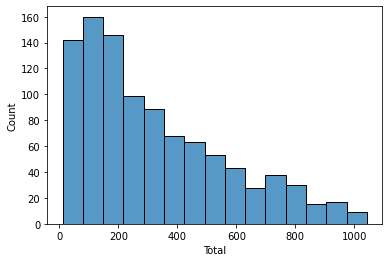

In [12]:
sns.histplot(df["Total"])

<AxesSubplot:xlabel='Customer type', ylabel='Count'>

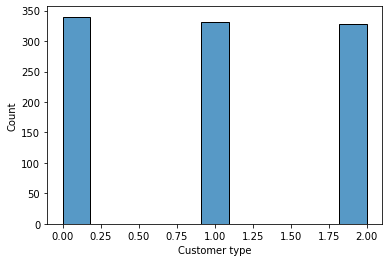

In [14]:
sns.histplot(df["Customer type"])

In [16]:
X = df.drop(columns="Rating")
y = df["Rating"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
reg_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2))

In [20]:
reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=2))])

In [21]:
reg_pipe.score(X_train, y_train)

0.4989646702942401

In [22]:
reg_pipe.score(X_test, y_test)

-0.4643259960817925

In [23]:
X = df.drop(columns="Rating")
y = df["Rating"]

In [25]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [26]:
pca = PCA()
pca.fit(scaled_df)

PCA()

Text(0, 0.5, 'Proportion of explained variance')

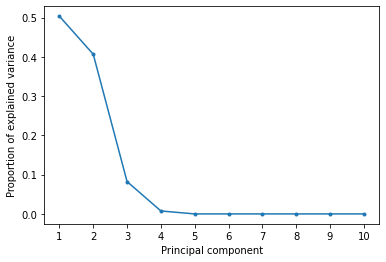

In [27]:
plt.plot(range(1, 11), pca.explained_variance_ratio_[:10], marker=".")
plt.xticks(ticks=range(1, 11))

plt.xlabel("Principal component")
plt.ylabel("Proportion of explained variance")

In [29]:
X = df.loc[:, ['Branch','City','Customer type','Gender','Product line','Unit price','Quantity','Tax 5%','Total','Payment','cogs','gross margin percentage','gross income']].values

In [30]:
y = df.loc[:, "Rating"].values

In [31]:
reg = LinearRegression(fit_intercept=True)

In [32]:
reg.fit(X, y)

LinearRegression()

In [33]:
preds = reg.predict(X)

In [34]:
reg.score(X, y)

0.004093292609817056

In [37]:
r2_score(y, preds)

0.004093292609817056

In [38]:
np.sum(np.abs(y-preds))/len(preds)

1.4746975381677843

In [40]:
mean_absolute_error(y, preds)

1.4746975381677843

In [41]:
np.sum((y-preds)**2)/len(preds)

2.9384871852777703

In [42]:
mean_squared_error(y, preds)

2.9384871852777703

In [43]:
np.sqrt(np.sum((y-preds)**2)/len(preds))

1.7142016174527925

In [44]:
np.sqrt(mean_squared_error(y,preds))

1.7142016174527925

In [45]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
input_shape = X_train.shape[1]
input_shape

13

In [49]:
model = Sequential()

In [50]:
model.add(Dense(19, input_dim=input_shape, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(15, activation="relu"))

In [51]:
model.add(Dense(1, activation="sigmoid"))

In [52]:
model.compile(loss="bce", optimizer="adam")

In [53]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=35)

Epoch 1/35
24/24 [==============================] - 1s 8ms/step - loss: -2.3204 - val_loss: -4.4796
Epoch 2/35
24/24 [==============================] - 0s 2ms/step - loss: -7.5232 - val_loss: -11.2874
Epoch 3/35
24/24 [==============================] - 0s 2ms/step - loss: -17.1582 - val_loss: -24.7936
Epoch 4/35
24/24 [==============================] - 0s 2ms/step - loss: -38.2424 - val_loss: -56.2666
Epoch 5/35
24/24 [==============================] - 0s 2ms/step - loss: -87.6683 - val_loss: -130.0909
Epoch 6/35
24/24 [==============================] - 0s 2ms/step - loss: -197.0218 - val_loss: -282.6852
Epoch 7/35
24/24 [==============================] - 0s 2ms/step - loss: -410.4067 - val_loss: -566.1496
Epoch 8/35
24/24 [==============================] - 0s 2ms/step - loss: -790.5849 - val_loss: -1050.5609
Epoch 9/35
24/24 [==============================] - 0s 2ms/step - loss: -1414.4271 - val_loss: -1822.0437
Epoch 10/35
24/24 [==============================] - 0s 2ms/step - loss: 

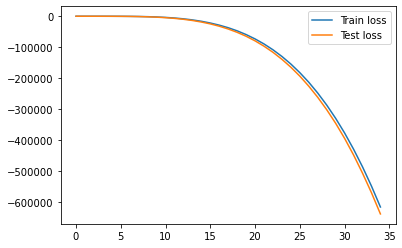

In [55]:
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Test loss")

plt.legend()